## Figures

Make figures for the markov motion correction project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/jenna/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
baseDir = '/home/jenna/Research/CHP-PIRC/markov-movement-correction/'

## Defining the Color Palette

Use seaborn to define the color palette for all figure generating functions

In [3]:
def defineColorPalette():
    """
    Use the seaborn library to define a better looking color palette.
    
    Currently takes no inputs, but that might change as I make more
    palettes
    
    Returns:
    - palette: the seaborn palette defined
    """
    # try using the xkcd_rgb colors
    # want 6 colors
    colors = ['blue', 'cherry red', 'golden yellow', 'vibrant green', 'violet', 'pumpkin orange']
    palette = sns.xkcd_palette(colors)
    
    return palette

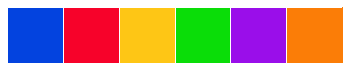

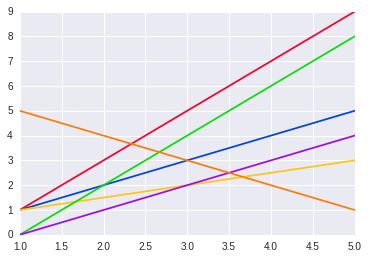

In [4]:
palette = defineColorPalette()
sns.palplot(palette)

# test plot
x = [1, 2, 3, 4, 5]
y1 = [1, 2, 3, 4, 5]
y2 = [1, 3, 5, 7, 9]
y3 = [1, 1.5, 2, 2.5, 3]
y4 = [0, 2, 4, 6, 8]
y5 = [0, 1, 2, 3, 4]
y6 = [5, 4, 3, 2, 1]

fig = plt.figure()
sns.set_palette(palette)
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4)
plt.plot(x, y5)
plt.plot(x, y6)
plt.show()

## Similarity Metrics for Registration

- Correlation Ratio
- Mutual Information

In [8]:
def plotTimeseriesSimilarities(timepoints, preReg, postReg1, 
                               markovReg1, 
                               title='', ylabel='Similarity Metric',
                               simLabels=[], outFn=''):
    """
    Plot the similarity metric for each time point image to the
    template image for pre and post registration.
    
    The metrics are calculated using Raf's similarity.sh script.
    (Uses flirt)
    
    Inputs:
    - timepoints: the timepoints in the image
    - preReg
    - postReg1
    - postReg2
    - markovReg1
    - markovReg2
    - title: title for the graph
    - labels: the labels for the different signals
    - outFn: filename for the output (optional, leave empty if you
             don't want to save)
    
    Effects:
    - builds a graph that shows the similarities of each timepoint 
      image to the template image
    """
    sns.set_style("white")
    fig = plt.figure()
    
    # set the palette
    palette = defineColorPalette()
    sns.set_palette(palette)
    
    # put signals on graph
    print(simLabels)
    l1, = plt.plot(timepoints, preReg, label=simLabels[0])
    l2, = plt.plot(timepoints, postReg1, label=simLabels[1])
    l3, = plt.plot(timepoints, )
    
    # put legend on graph
    plt.legend(handles=[l1, l2], loc=2)
    
    plt.title(title)
    plt.xlabel('Timepoints')
    plt.ylabel(ylabel)
    
    plt.show()

    # saving the plot as an image
    if not outFn == '':
        fig.savefig(outFn, bbox_inches='tight')

In [6]:
# load the data
preReg_df = pd.read_csv(baseDir+'similarities_preregistration.csv')
regNonAffine_df = pd.read_csv(baseDir+'similarities_registered_nonAffine.csv')
marNonAffine_df = pd.read_csv(baseDir+'similarities_markov_nonAffine.csv')

# get the signals from the data
time = preReg_df[list(preReg_df)[0]].tolist()
preReg_CorrRatio = preReg_df[list(preReg_df)[1]].tolist()
preReg_MI = preReg_df[list(preReg_df)[2]].tolist()

regNA_CorrRatio = regNonAffine_df[list(regNonAffine_df)[1]].tolist()
regNA_MI = regNonAffine_df[list(regNonAffine_df)[2]].tolist()

marNA_CorrRatio = marNonAffine_df[list(marNonAffine_df)[1]].tolist()
marNA_MI = marNonAffine_df[list(marNonAffine_df)[2]].tolist()

# set up the labels
simLabels = ['No Correction', 'Non-Markov Correction', 'Markov Correction']

In [7]:
len(time)

150

['No Correction', 'Non-Markov Correction', 'Markov Correction']


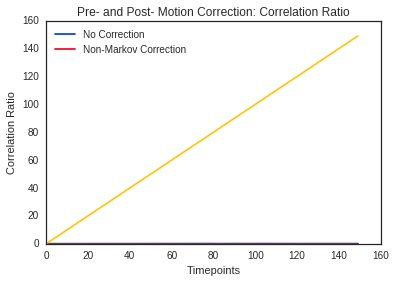

In [10]:
# plot the data - correlation ratio
plotTimeseriesSimilarities(time, preReg_CorrRatio, regNA_CorrRatio, 
                           marNA_CorrRatio,
                           title='Pre- and Post- Motion Correction: Correlation Ratio', 
                           ylabel='Correlation Ratio',
                           simLabels=simLabels)

['No Correction', 'Non-Markov Correction', 'Markov Correction']


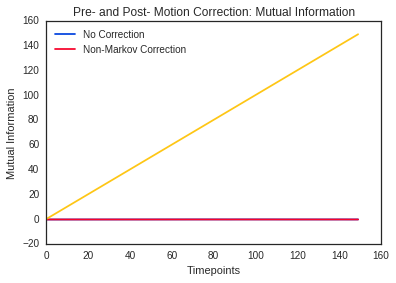

In [12]:
plotTimeseriesSimilarities(time, preReg_MI, regNA_MI, 
                           marNA_MI,
                           title='Pre- and Post- Motion Correction: Mutual Information', 
                           ylabel='Mutual Information',
                           simLabels=simLabels)